## Importing Libraries & Data

In [35]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor    

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Reading in cleaned data -- dropping the columns with irrelevant targets
df = pd.read_csv('../data/exports/health_landscape_clean.csv').drop(columns=['avgLifeExpec',
                                                                             'pct_diabetes_13',
                                                                             'strokeDeath_rate'])

In [3]:
## Takes a dataframe with a "FIPS County" code and translates it into an object
## This is done because the csv saves codes such as 01001 as 1001
def fips_to_obj(df):
    df['FIPS'] = [int(i) for i in df['FIPS'].fillna(0)]
    df['FIPS'] = df['FIPS'].astype('object')
    fips_list = []
    for i in df['FIPS']:
        if len(str(i)) < 5:
            fips_list.append('0' + str(i))
        else:
            fips_list.append(str(i))
    df['FIPS'] = fips_list
    return df

df = fips_to_obj(df)

## Replicating Study

In [19]:
## Setting feature set and target for OLS model
X = df[['foodSwamp_14','pct_lowAccessInc_15','recreationFacilities_14', 'povRate_15','natAmenityIndex',
        'milkSoda_priceRatio_10', 'pct_black', 'pct_hispanicORlatino','pct_over65','totalArea']]
y = df['obesityRate_13']

## Setting SKLearn linear regression
lr = LinearRegression()
lr.fit(X, y)
print('Score:',lr.score(X, y))
print('Cross val score:',cross_val_score(lr, X, y, cv=5, scoring='explained_variance').mean())

Score: 0.44345542712843067
Cross val score: 0.3508528154052518


In [5]:
## Setting OLS model using statsmodels
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         obesityRate_13   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     243.9
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        08:51:57   Log-Likelihood:                -8085.6
No. Observations:                3072   AIC:                         1.619e+04
Df Residuals:                    3061   BIC:                         1.626e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      31.4872      0.574     54.833      0.000      30.361      32.613
foodSwamp_14                0.1325      0.025      5.281      0.000       0.083       0.182
pct_lowAccessInc_15         0.0058      0.008      0.715      0.475      -0.010       0.022
recreationFacilities_14    -0.0254      0.002    -13.008      0.000      -0.029      -0.022
povRate_15                  0.2377      0.012     20.196      0.000       0.215       0.261
natAmenityIndex            -1.4253      0.068    -20.819      0.000      -1.560      -1.291
milkSoda_priceRatio_10      1.3419      0.528      2.539      0.011       0.306       2.378
pct_black                   3.9928      0.554      7.209      0.000       2.907       5.079
pct_hispanicORlatino       -5.8246      0.527    -11.056      0.000      -6.858      -4.792
pct_over65                 -4.7645      1.568     -3.039      0.002      -7.839      -1.690
totalArea               -7.171e-06   5.31e-05     -0.135      0.893      -0.000     9.7e-05
==============================================================================
Omnibus:                       53.436   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.589
Skew:                          -0.211   Prob(JB):                     1.05e-16
Kurtosis:                       3.630   Cond. No.                     4.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
## Examining for any multicollinearity
pd.Series([variance_inflation_factor(X.values, i) 
            for i in range(X.shape[1])], 
            index=X.columns)

const                      89.200261
foodSwamp_14                1.189776
pct_lowAccessInc_15         1.137420
recreationFacilities_14     1.166298
povRate_15                  1.540199
natAmenityIndex             1.376809
milkSoda_priceRatio_10      1.402644
pct_black                   1.750550
pct_hispanicORlatino        1.405352
pct_over65                  1.325864
totalArea                   1.356419
dtype: float64

## Standardized Coefficient
The standardized coefficient can better tell us how much each independent variable is affecting the target.

In [25]:
## Setting feature set and target for OLS model
X = df[['foodSwamp_14','pct_lowAccessInc_15','recreationFacilities_14', 'povRate_15','natAmenityIndex',
        'milkSoda_priceRatio_10', 'pct_black', 'pct_hispanicORlatino','pct_over65','totalArea']]
y = df['obesityRate_13']

## Standadizing
ss = StandardScaler()
Xs = pd.DataFrame(columns=X.columns, data=ss.fit_transform(X.values))

In [28]:
## Setting OLS model using statsmodels
Xs = sm.add_constant(Xs)
model = sm.OLS(y, Xs).fit()
predictions = model.predict(Xs)
model.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         obesityRate_13   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     243.9
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:00:36   Log-Likelihood:                -8085.6
No. Observations:                3072   AIC:                         1.619e+04
Df Residuals:                    3061   BIC:                         1.626e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      31.0409      0.061    510.531      0.000      30.922      31.160
foodSwamp_14                0.3502      0.066      5.281      0.000       0.220       0.480
pct_lowAccessInc_15         0.0464      0.065      0.715      0.475      -0.081       0.173
recreationFacilities_14    -0.8541      0.066    -13.008      0.000      -0.983      -0.725
povRate_15                  1.5239      0.075     20.196      0.000       1.376       1.672
natAmenityIndex            -1.4852      0.071    -20.819      0.000      -1.625      -1.345
milkSoda_priceRatio_10      0.1828      0.072      2.539      0.011       0.042       0.324
pct_black                   0.5799      0.080      7.209      0.000       0.422       0.738
pct_hispanicORlatino       -0.7969      0.072    -11.056      0.000      -0.938      -0.656
pct_over65                 -0.2127      0.070     -3.039      0.002      -0.350      -0.075
totalArea                  -0.0096      0.071     -0.135      0.893      -0.148       0.129
==============================================================================
Omnibus:                       53.436   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.589
Skew:                          -0.211   Prob(JB):                     1.05e-16
Kurtosis:                       3.630   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Visualize Predictions

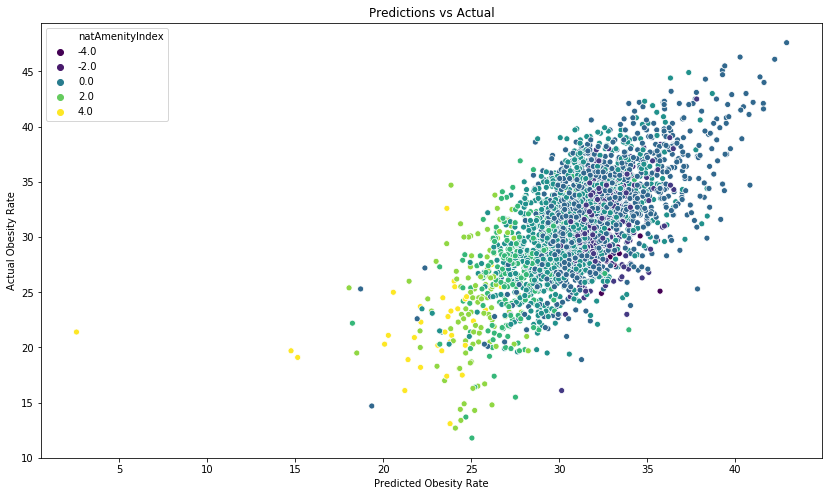

In [61]:
## Natural Amenities Index shows a strong linear correlation (food swamps was less visible)
plt.figure(figsize=(14,8))
ax = sns.scatterplot(predictions, y, hue=Xs['natAmenityIndex'], palette='viridis', legend="brief");
ax.set(xlabel="Predicted Obesity Rate", ylabel="Actual Obesity Rate", title="Predictions vs Actual");